<a href="https://colab.research.google.com/github/nihalhabeeb/Health_Insurance_Cross_Sell_Prediction/blob/main/Health_Insurance_Cross_Sell_Prediction_Team_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

### **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response (target) :	1 : Customer is interested, 0 : Customer is not interested

In [1]:
# import libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

In [2]:
# mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Supervised ML Classification - Nihal Habeeb/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')
data.shape

(381109, 12)

The dataset contains 381109 rows and 12 columns including the target variable.

In [4]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Let us get information regarding missing values.

In [5]:
# checking the data type and non null value count of each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


There are no null values in any of the columns.

**Descriptive Statistics**

In [6]:
# statistical summary of numerical variables

In [7]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


We can see Driving_License and Previously_Insured might be binary categorical variables which are in numerical form (0 and 1). In addition, most of the driving license data is 1 (customer has DL).

## **Exploratory Data Analysis**

### **Response (target variable)**

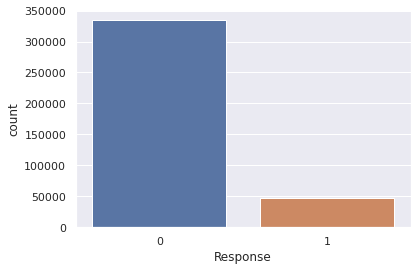

In [8]:
sns.countplot(data['Response'])

The data is heavily unbalanced. There are very few interested customers (less than 50000) in comparison to uninterested customers (nearly 350000).

Let us explore all the variables in detail.

In [9]:
# numerical varibles
data.describe().columns

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

id does not provide any relevant insight on the data as it is just unique index.

#### **Age**

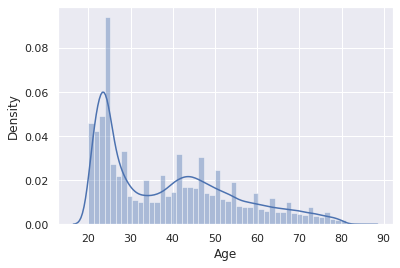

In [10]:
# distribution of age variable
sns.distplot(data['Age'])

The distribution is positively skewed with a peak around 25 years and a second peak around 45. More of the customers in the dataset are towards their thirties or less.

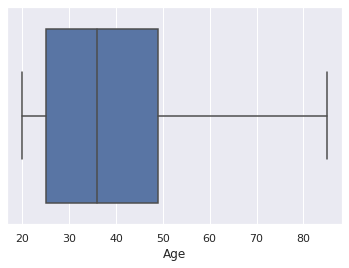

In [11]:
sns.boxplot(data['Age'])

The box plot confirms the skew and also shows the absence of outliers.

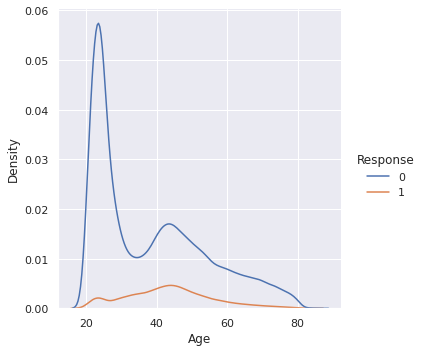

In [12]:
# Interested and uninterested customers count across age
# plt.figure(figsize=(18,8))
# sns.countplot(x = 'Age', hue = 'Response', data = data)
sns.displot(x = 'Age', hue = 'Response', data = data, kind = 'kde')

Here we look at a detailed plot of response count across age. Eventhough more of the customers are young, the number of interested customers among the youngsters in relation to the uninterested customers are way less in comparison to the older (or middle-aged) customers. There could be multiple possible reasons, such as lack of seriousness about vehicle safety, or simply because their vehicles are inexpensive as opposed to that of the middle-aged section.

We can see both interested and uninterested customer numbers reducing as we go to the other end. Very old people are less likely to drive and hence want a vehicle insurance.

### **Driving License**

In [13]:
# count of customers with and without DL
data['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

Most of the customers have driving license.

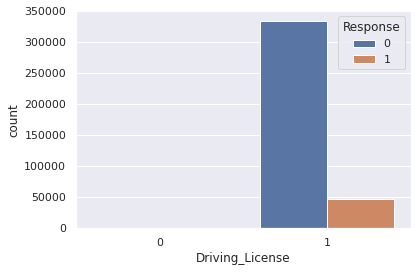

In [14]:
# response count for customers with and without DL
sns.countplot(data['Driving_License'],hue=data['Response'])

As we know, the number of customers without DL is very low (hence not visible in the plot). Out of the customers with DL, most of them are uninterested (we already know that the total number of interested customers is very less).

In [15]:
# count of interested customers with and without DL
data.groupby('Driving_License')['Response'].sum()

Driving_License
0       41
1    46669
Name: Response, dtype: int64

Only 41 of the 812 customers without DL are interested in vehicle insurance.

We can also explore the age-wise distribution of people with DL in order to compare it with our earlier plot of age-wise distribution of response.

In [16]:
# number of customers with DL across age (sorted)
data.groupby('Age')['Driving_License'].sum().sort_values(ascending = False)

Age
24    25959
23    24256
22    20964
25    20636
21    16456
      ...  
81       50
82       26
83       21
84       10
85       10
Name: Driving_License, Length: 66, dtype: int64

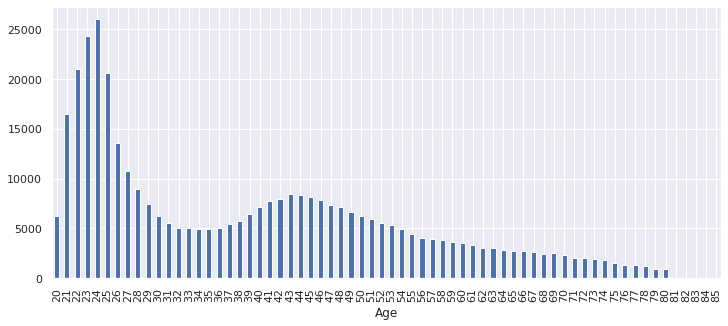

In [17]:
# distribution of customers with DL across age
plt.figure(figsize=(12,5))
data.groupby('Age')['Driving_License'].sum().plot(kind = 'bar')

This mirrors the overall age distribution of customers in the data. The low count of customers with DL among older people might explain the lesser number of customers interested in vehicle insurance in that section.

### **Region Code**

Region code is a unique code (number) referring to the customer's region. From the descriptive statistics we can see it ranges from 0 to 52. 

In [18]:
# descriptive statistics of region code column
data['Region_Code'].describe()

count    381109.000000
mean         26.388807
std          13.229888
min           0.000000
25%          15.000000
50%          28.000000
75%          35.000000
max          52.000000
Name: Region_Code, dtype: float64

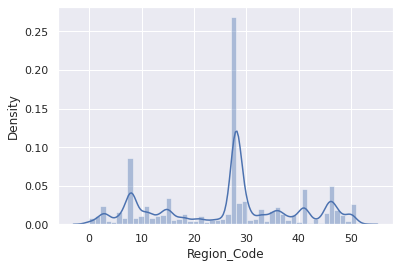

In [19]:
# distribution of Region code
sns.distplot(data['Region_Code'])

The distribution is far from normal with multiple peaks throughout.

## **Previously_Insured**

This variable refers to whether the customer already has insured their vehicle previously (1) or not (0).

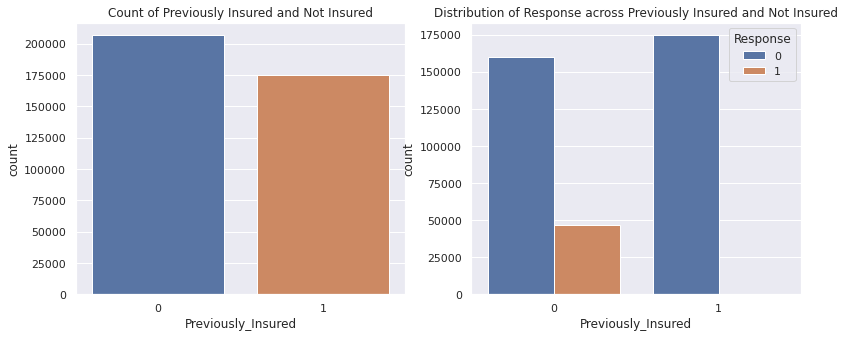

In [20]:
fig = plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(data['Previously_Insured'])
plt.title('Count of Previously Insured and Not Insured')
plt.subplot(1,2,2)
sns.countplot(x = 'Previously_Insured', hue = 'Response', data = data)
plt.title('Distribution of Response across Previously Insured and Not Insured')
plt.show()

Out of the customers data, the number of customers who did not insure their vehicle previously is higher than those who did.

The section of customers who are not previously insured has a much higher share of interested customers (thus are more likely to opt it).

We can observe that out of the customers who have already insured, almost no one is interested in the vehicle insurance. We can see the exact number below. Only 158 people out of the previously insured are interested.

In [21]:
# number of interested customers out of previously insured and not insured
data.groupby('Previously_Insured')['Response'].sum()

Previously_Insured
0    46552
1      158
Name: Response, dtype: int64

### **Annual Premium**

In [22]:
# descriptive statistics of annual premium
data['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

The premium paid ranges form around 2600 to 5,40,000.

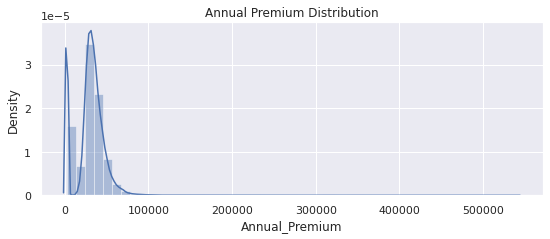

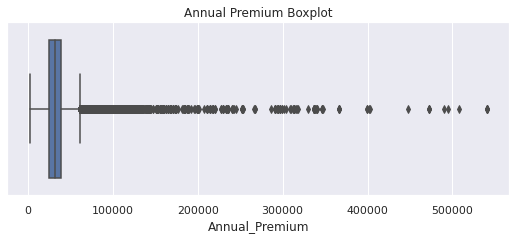

In [23]:
# distribution of annual premium
plt.figure(figsize = (9,7))
plt.subplot(2,1,1)
sns.distplot(data['Annual_Premium'])
plt.title('Annual Premium Distribution')
plt.figure(figsize = (9,7))
plt.subplot(2,1,2)
sns.boxplot(data['Annual_Premium'])
plt.title('Annual Premium Boxplot')
plt.show()

The distribution is right skewed but has another peak close to zero. We can observe a lot of outliers (from the boxplot).

In [24]:
data['Annual_Premium'].value_counts().sort_values(ascending = False)

2630.0      64877
69856.0       140
39008.0        41
38287.0        38
45179.0        38
            ...  
16882.0         1
102370.0        1
15647.0         1
51800.0         1
69845.0         1
Name: Annual_Premium, Length: 48838, dtype: int64

There are a lot of customers paying annual premium of 2630 leading to the peak near zero.

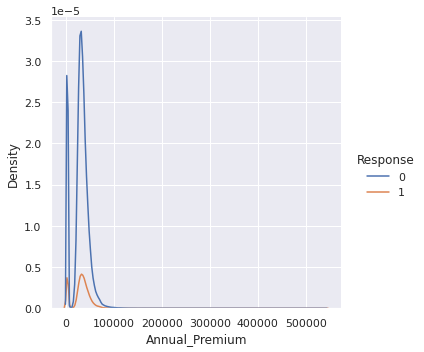

In [25]:
# density estimation using kde
# distribution of interested and uninterested response across annual premium
sns.displot(x = 'Annual_Premium', hue = 'Response', data = data, kind = 'kde')

Both responses have similar distribution but with the Uninterested customers distribution having much higher magnitude.

### **Policy Sales Channel**

It refers to the anonymized code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

In [26]:
# descriptive statistics
data['Policy_Sales_Channel'].describe()

count    381109.000000
mean        112.034295
std          54.203995
min           1.000000
25%          29.000000
50%         133.000000
75%         152.000000
max         163.000000
Name: Policy_Sales_Channel, dtype: float64

The value ranges from 1 to 163.

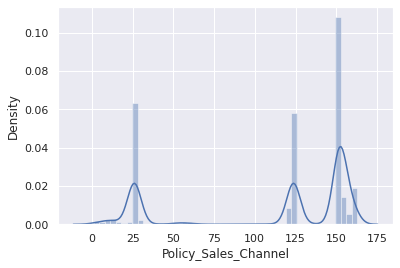

In [27]:
sns.distplot(data['Policy_Sales_Channel'])

There are multiple peaks in the distribution.

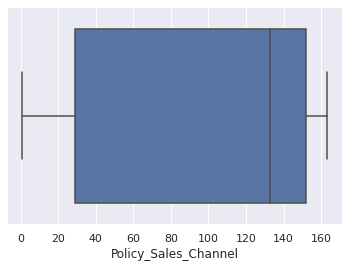

In [28]:
sns.boxplot(data['Policy_Sales_Channel'])

There are no oultiers in Policy Sales Channel

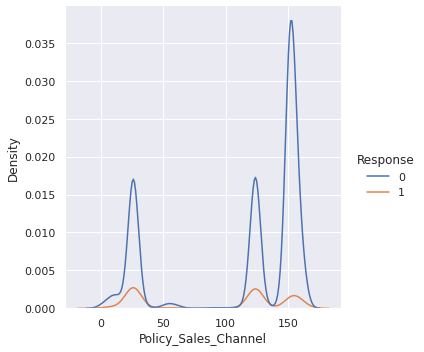

In [29]:
# density estimation using kde
# distribution of interested and uninterested response across Policy Sales Channel
sns.displot(x = 'Policy_Sales_Channel', hue = 'Response', data = data, kind = 'kde')

Both responses have similar distribution pattern with the Uninterested customers distribution having much higher magnitude.

### **Vintage** 

It refers to the number of days the customer has been associated with the company.

In [30]:
# descriptive statistics
data['Vintage'].describe()

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

It ranges from 10 days to 299.

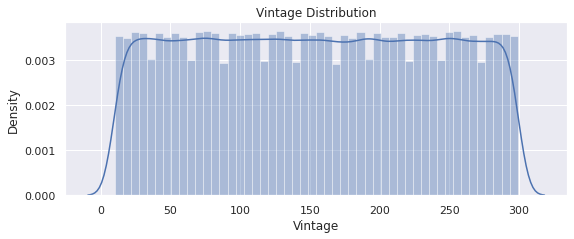

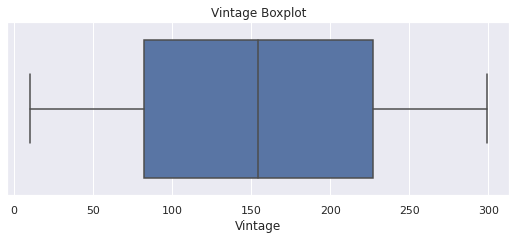

In [31]:
# distribution of Vintage
plt.figure(figsize = (9,7))
plt.subplot(2,1,1)
sns.distplot(data['Vintage'])
plt.title('Vintage Distribution')
plt.figure(figsize = (9,7))
plt.subplot(2,1,2)
sns.boxplot(data['Vintage'])
plt.title('Vintage Boxplot')
plt.show()

The distribution of customers across vintage is almost uniform. We observe no outliers as well.

### **Gender**

It is a categorical variable referring to the gender of the customer.

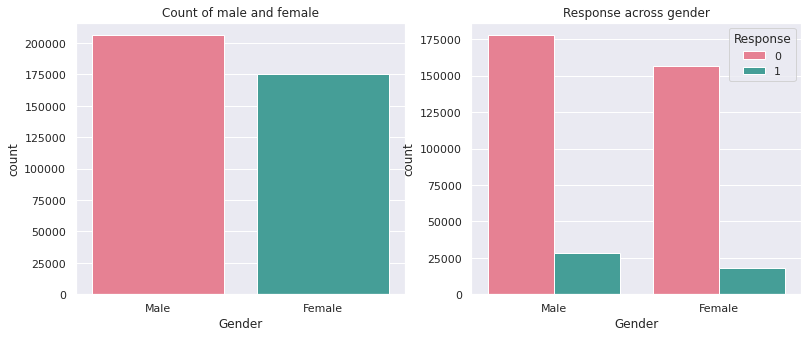

In [32]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(data['Gender'],palette='husl')
plt.title("Count of male and female")
plt.subplot(1,2,2)
sns.countplot(data['Gender'], hue = data['Response'],palette="husl")
plt.title("Response across gender")
plt.show()

The gender varible ratio in the dataset is almost equal. The number of males (200000) is slightly more than females (175000). The number of males who are interested is greater than 25000 and the number of females who are interested is below 25000. It doesn't necessarily imply that males have a higher tendency to buy insurance and could most likely be a result of total number of men being higher than total number of women in the data (original data of policy holders).

In [33]:
# number of males and females with driving license
data.groupby('Gender')['Driving_License'].sum()

Gender
Female    174808
Male      205489
Name: Driving_License, dtype: int64

The number of males with DL is greater. This could be one reason for the lesser number of women interested in vehicle insurance.

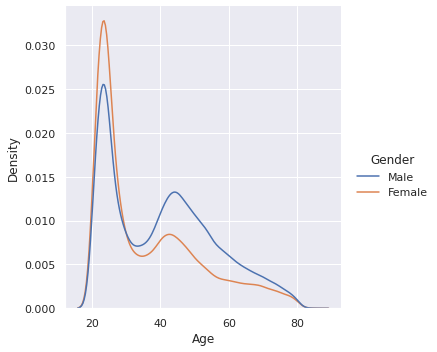

In [34]:
# distribution of customers across age for both men and women 
sns.displot(x = 'Age', hue = 'Gender', data = data, kind = 'kde')

We can observe that in case of younger people (20-30 years) there are more women than men in the data of policy holders while in case of older people it is lesser.

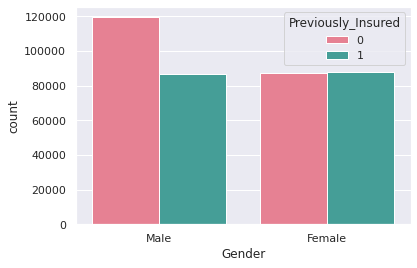

In [35]:
sns.countplot(data['Gender'], hue = data['Previously_Insured'],palette="husl")

In case of males, there are much more customers who did not previously have vehicle insurance while in case of females, the number is balanced.

### **Age of Vehicle**

It is a categorical variable with three categories referring to the age of the vehicle.

In [36]:
data['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

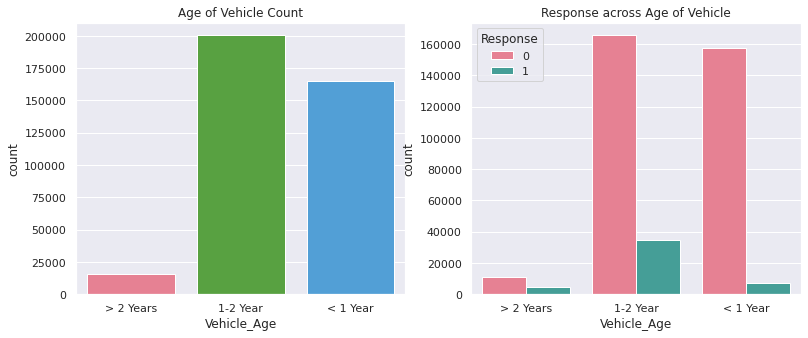

In [37]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(data['Vehicle_Age'],palette='husl')
plt.title("Age of Vehicle Count")
plt.subplot(1,2,2)
sns.countplot(data['Vehicle_Age'], hue = data['Response'],palette="husl")
plt.title("Response across Age of Vehicle")
plt.show()

The number of customers with their vehicle age between 1 and 2 years is the highest of the three. We can also observe that the number of interested customers is also highest for this category (1-2 years). To find the percentage of interested customers across the three categories, we can use cross tabulation.

In [38]:
# crosstabulation between vehicle age and response
pd.crosstab(data['Vehicle_Age'],data['Response']).rename(columns = {0:'Not Interested',1:'Interested'})

Response,Not Interested,Interested
Vehicle_Age,,
1-2 Year,165510,34806
< 1 Year,157584,7202
> 2 Years,11305,4702


In case of vehicle age 1-2 years category, the number of interested customers is 34806 and uninterested customers is 165510 while in case of vehicle age >2 years category, interested customers is only 4702 and uninterested customers is 11305. We can compute the percentage of interested customers for each vehicle age category.

In [39]:
# crosstabulation dataframe
vehicle_age_response_df = pd.crosstab(data['Vehicle_Age'],data['Response'])
# total customers in each category
vehicle_age_response_df['Total'] = vehicle_age_response_df[0] + vehicle_age_response_df[1]
# percentage of interested customers in each category
vehicle_age_response_df['Percentage of Interested'] = (vehicle_age_response_df[1]/(vehicle_age_response_df['Total']))*100

In [40]:
vehicle_age_response_df

Response,0,1,Total,Percentage of Interested
Vehicle_Age,,,,
1-2 Year,165510,34806,200316,17.375547
< 1 Year,157584,7202,164786,4.370517
> 2 Years,11305,4702,16007,29.374649


We observe that '>2 years' is the category with the highest percentage of interested customers (eventhough the numbers are lower than the others) followed by '1-2 years' and finally '<1 year'.

### **Vehicle Damage**

Refers to whether the customer got his/her vehicle damaged in the past or not.

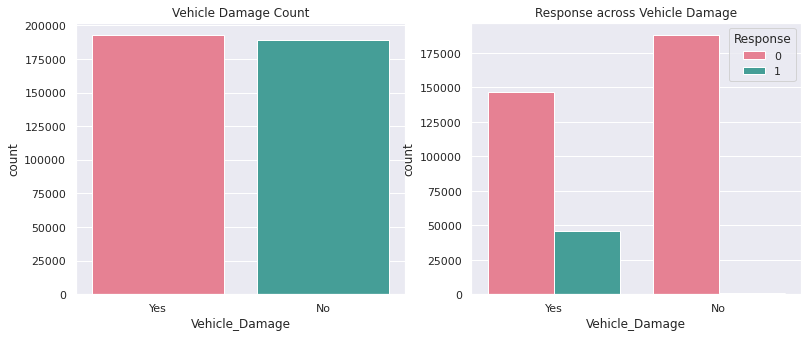

In [41]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(data['Vehicle_Damage'],palette='husl')
plt.title("Vehicle Damage Count")
plt.subplot(1,2,2)
sns.countplot(data['Vehicle_Damage'], hue = data['Response'],palette="husl")
plt.title("Response across Vehicle Damage")
plt.show()

The number of customers who had their vehicle damaged in the past and that of customers who did not have it damaged is around the same.

Most of the customers who did not have their vehicle damaged are not interested in the insurance (almost no customers are interested). While in case of customers who did have their vehicle damaged, close to 50,000 people are interested in the insurance.

In [42]:
# crosstabulation between vehicle damage and response
pd.crosstab(data['Vehicle_Damage'],data['Response']).rename(columns = {0:'Not Interested',1:'Interested'})

Response,Not Interested,Interested
Vehicle_Damage,,
No,187714,982
Yes,146685,45728


We can see that out of the customers who did not have their vehicle damaged in the past, only 982 are interested.

### **Correlation**

We can look for multicollinearity between the variables by plotting a correlation heatmap.

Text(0.5, 1.05, 'Correlation Heatmap')

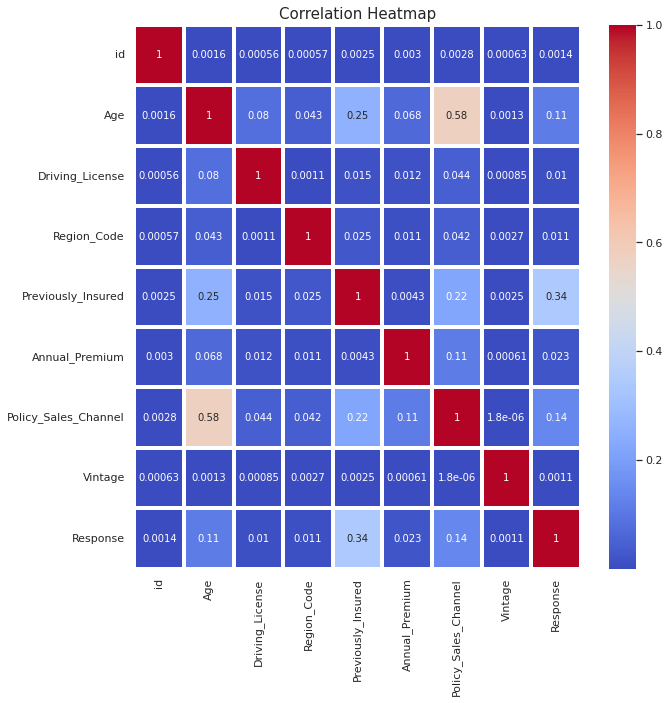

In [43]:
corr = data.corr()
plt.figure(figsize = (10,10))
# f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(abs(corr), annot=True,linewidths=3,cmap='coolwarm')
plt.title("Correlation Heatmap", y=1.05, size=15)

None of the variables have high correlation with each other.